In [1]:
#@title Default title text
unseen_subj =  1617#@param {type:"integer"}


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
import json

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from datetime import datetime


!nvidia-smi

Mon Mar 15 14:28:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
project_dir="/content/drive/MyDrive/comp598-II/project"

src_dir=os.path.join(project_dir,"src")
datadir=os.path.join(project_dir,"data/")
npy_dir=os.path.join(project_dir,"data/npy")
result_dir=os.path.join(project_dir,"notebooks/DANN-WISDM/experiments")

import sys
sys.path.append(src_dir)

import dann_v1 as dann

In [4]:
seen_subj = list(range(1600,1605))

In [5]:
save_dir=str(seen_subj[0])+"-"
for s in seen_subj[1:]:
  save_dir+=(str(s)[2:]+"-")

save_dir+=("to-{}".format(unseen_subj))
save_dir=os.path.join(result_dir,save_dir)

try:  
    os.mkdir(save_dir)  
except OSError as error:  
    print(error) 

[Errno 17] File exists: '/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1617'


In [6]:
summary={}

alpha=0.75
batchsize=32
EPOCHS=90
indomain_epoch=20
cv=5

clf_lr= 1e-4
disc_lr=1e-4
ext_lr= 1e-4

act_subset=['Walking',
            'Clapping',
            'Drinking from Cup',
            'Jogging',
            'Brushing Teeth',
            'Typing',
            'Writing',
            'Stairs']

seen_device, unseen_device = "watch", "watch"
seen_sensor, unseen_sensor = "accel", "accel"


with open(os.path.join(datadir,"act_to_int.json"),"r") as jpath:
  act_int_lookup=json.load(jpath)

int_act_lookup={act_int_lookup[key]:key for key in act_int_lookup}

(seen_x,seen_y),(unseen_x,unseen_y),num_class, remapping_dict = dann.load_subjects(npy_dir,
                                                                   seen_subj,
                                                                   seen_device,
                                                                   seen_sensor,
                                                                   unseen_subj,
                                                                   unseen_device,
                                                                   unseen_sensor,
                                                                   act_int_lookup,
                                                                   act_subset)

remapped_int_act_lookup={remapping_dict[key]:int_act_lookup[int(remapping_dict[key])] for key in remapping_dict}
print(remapped_int_act_lookup)

print(seen_x.shape,seen_y.shape)
print(unseen_x.shape,unseen_y.shape)

{0: 'Walking', 1: 'Jogging', 2: 'Stairs', 3: 'Sitting', 4: 'Standing', 5: 'Typing', 6: 'Brushing Teeth', 7: 'Eating Soup'}
(2840, 100, 3) (2840,)
(568, 100, 3) (568,)


In [7]:
summary['alpha']=alpha
summary['batchsize']=batchsize
summary['crossdomain epoch']=EPOCHS
summary['indomain epoch']=indomain_epoch

summary['clf lr']=clf_lr
summary['disc lr']=disc_lr
summary['ext lr']=ext_lr
summary['act']=remapped_int_act_lookup

summary['source subj']=seen_subj
summary['source device']=seen_device
summary['source sensor']=seen_sensor
summary['source data shape']=seen_x.shape
summary['source class dist']=dann.label_breakdown(seen_y)

summary['target subj']=unseen_subj
summary['target device']=unseen_device
summary['target sensor']=unseen_sensor
summary['target data shape']=unseen_x.shape
summary['target class dist']=dann.label_breakdown(unseen_y)

In [8]:
summary

{'act': {0: 'Walking',
  1: 'Jogging',
  2: 'Stairs',
  3: 'Sitting',
  4: 'Standing',
  5: 'Typing',
  6: 'Brushing Teeth',
  7: 'Eating Soup'},
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'crossdomain epoch': 90,
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain epoch': 20,
 'source class dist': {0: 355,
  1: 355,
  2: 355,
  3: 355,
  4: 355,
  5: 355,
  6: 355,
  7: 355},
 'source data shape': (2840, 100, 3),
 'source device': 'watch',
 'source sensor': 'accel',
 'source subj': [1600, 1601, 1602, 1603, 1604],
 'target class dist': {0: 71, 1: 71, 2: 71, 3: 71, 4: 71, 5: 71, 6: 71, 7: 71},
 'target data shape': (568, 100, 3),
 'target device': 'watch',
 'target sensor': 'accel',
 'target subj': 1617}

epoch 1/90
18/18 [==============================] - 32s 71ms/batch - classifier acc: 0.4671 - classifier loss: 1.4307 - domain acc: 0.4955 - domain_loss: 0.5761
epoch 2/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.6414 - classifier loss: 0.8320 - domain acc: 0.5173 - domain_loss: 0.5530
epoch 3/90
18/18 [==============================] - 1s 53ms/batch - classifier acc: 0.7138 - classifier loss: 0.6297 - domain acc: 0.5721 - domain_loss: 0.5428
epoch 4/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.6941 - classifier loss: 0.7164 - domain acc: 0.6030 - domain_loss: 0.5197
epoch 5/90
18/18 [==============================] - 1s 53ms/batch - classifier acc: 0.7401 - classifier loss: 0.5949 - domain acc: 0.5814 - domain_loss: 0.5385
epoch 6/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.7500 - classifier loss: 0.5393 - domain acc: 0.5570 - domain_loss: 0.5430
epoch 7/90
18/18 [=====================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 1/5 ==========================
0.997887323943662
0.8556338028169014
0.4692879499217527
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1617/crossdomain-1_5.jpg
epoch 1/90
18/18 [==============================] - 1s 55ms/batch - classifier acc: 0.4161 - classifier loss: 1.4211 - domain acc: 0.5076 - domain_loss: 0.5395
epoch 2/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.6217 - classifier loss: 0.8663 - domain acc: 0.5290 - domain_loss: 0.5510
epoch 3/90
18/18 [==============================] - 1s 51ms/batch - classifier acc: 0.6793 - classifier loss: 0.7034 - domain acc: 0.5677 - domain_loss: 0.5394
epoch 4/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.6842 - classifier loss: 0.6650 - domain acc: 0.5478 - domain_loss: 0.5628
epoch 5/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.7286 - classifier loss: 0.5497 - do

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 2/5 ==========================
0.9809859154929578
0.8433098591549296
0.6353677621283255
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1617/crossdomain-2_5.jpg
epoch 1/90
18/18 [==============================] - 1s 67ms/batch - classifier acc: 0.4227 - classifier loss: 1.4269 - domain acc: 0.4883 - domain_loss: 0.5639
epoch 2/90
18/18 [==============================] - 1s 53ms/batch - classifier acc: 0.5609 - classifier loss: 0.9982 - domain acc: 0.5053 - domain_loss: 0.6150
epoch 3/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.6513 - classifier loss: 0.7525 - domain acc: 0.5519 - domain_loss: 0.5651
epoch 4/90
18/18 [==============================] - 1s 53ms/batch - classifier acc: 0.7171 - classifier loss: 0.5915 - domain acc: 0.5056 - domain_loss: 0.6394
epoch 5/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.7105 - classifier loss: 0.6080 - d

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 3/5 ==========================
0.9725352112676057
0.8080985915492958
0.49960876369327073
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1617/crossdomain-3_5.jpg
epoch 1/90
18/18 [==============================] - 1s 55ms/batch - classifier acc: 0.4408 - classifier loss: 1.4370 - domain acc: 0.5208 - domain_loss: 0.5214
epoch 2/90
18/18 [==============================] - 1s 51ms/batch - classifier acc: 0.6414 - classifier loss: 0.8375 - domain acc: 0.5235 - domain_loss: 0.5712
epoch 3/90
18/18 [==============================] - 1s 53ms/batch - classifier acc: 0.6118 - classifier loss: 0.8291 - domain acc: 0.4953 - domain_loss: 0.6662
epoch 4/90
18/18 [==============================] - 1s 53ms/batch - classifier acc: 0.7089 - classifier loss: 0.6108 - domain acc: 0.5213 - domain_loss: 0.5745
epoch 5/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.7023 - classifier loss: 0.5910 - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 4/5 ==========================
0.9985915492957746
0.8732394366197183
0.564358372456964
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1617/crossdomain-4_5.jpg
epoch 1/90
18/18 [==============================] - 1s 55ms/batch - classifier acc: 0.4211 - classifier loss: 1.4917 - domain acc: 0.4910 - domain_loss: 0.5916
epoch 2/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.6217 - classifier loss: 0.8419 - domain acc: 0.4336 - domain_loss: 0.6280
epoch 3/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.7072 - classifier loss: 0.6897 - domain acc: 0.5056 - domain_loss: 0.5844
epoch 4/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.6908 - classifier loss: 0.6303 - domain acc: 0.5471 - domain_loss: 0.5479
epoch 5/90
18/18 [==============================] - 1s 52ms/batch - classifier acc: 0.7237 - classifier loss: 0.6101 - do

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 5/5 ==========================
0.9989436619718309
0.903169014084507
0.4057120500782473
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1617/crossdomain-5_5.jpg


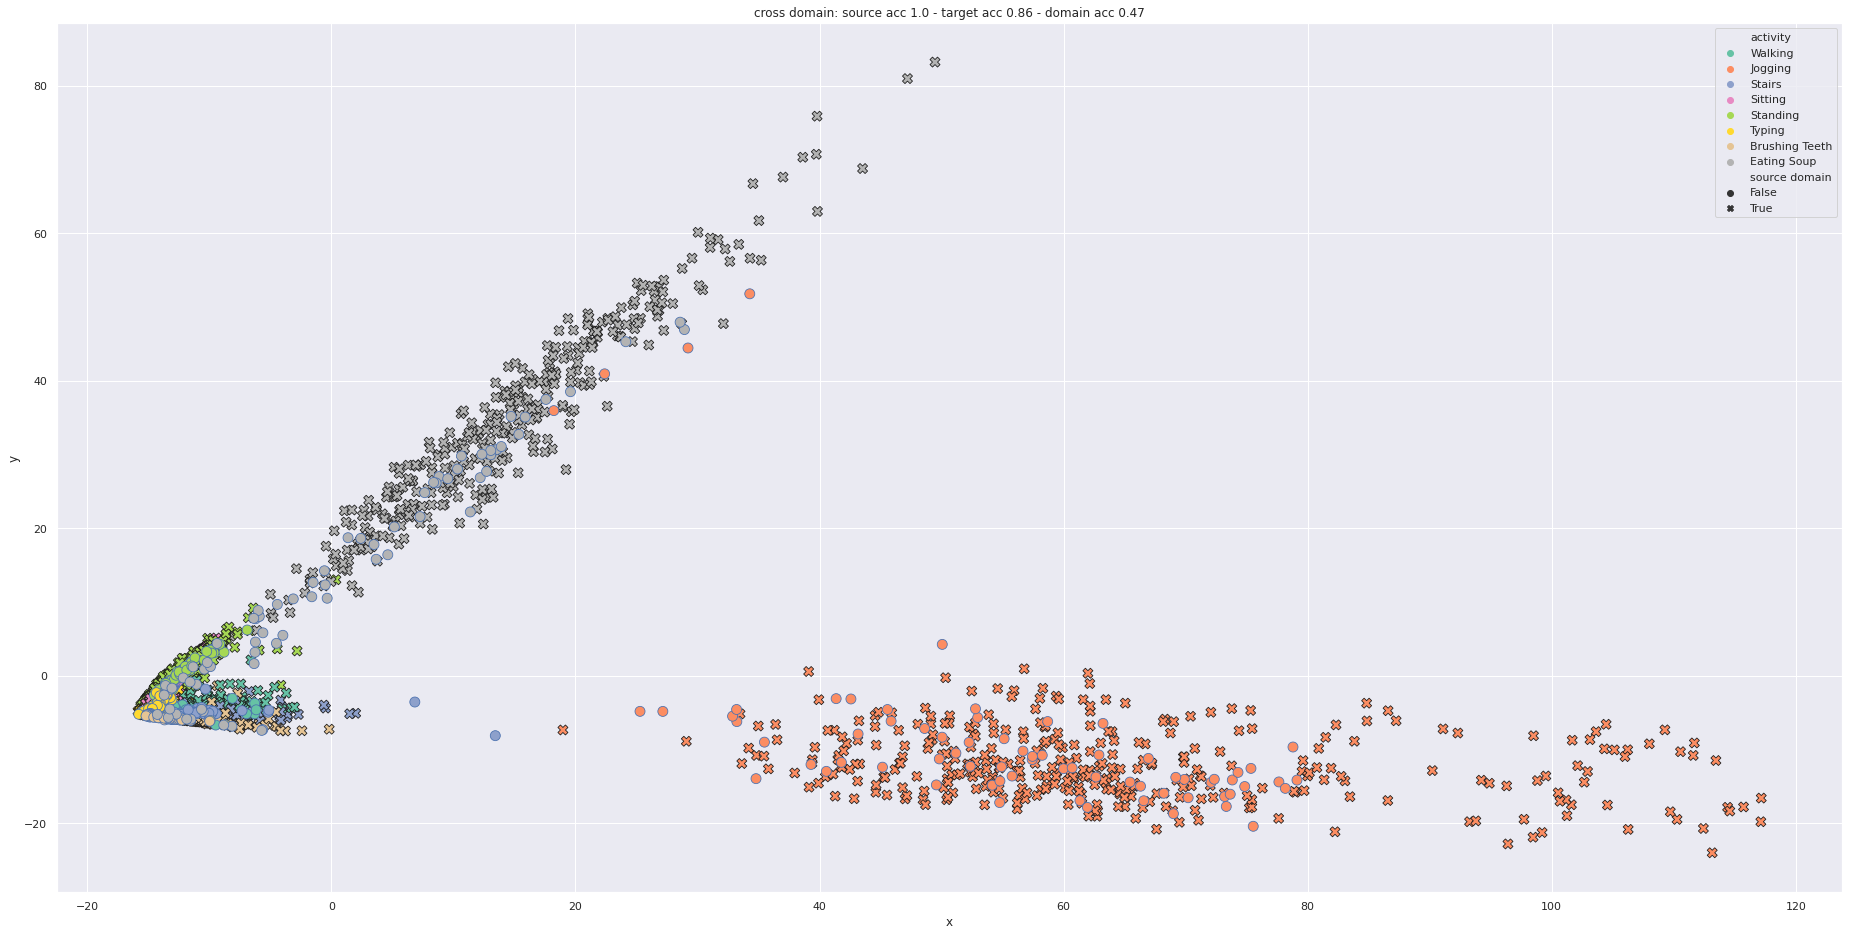

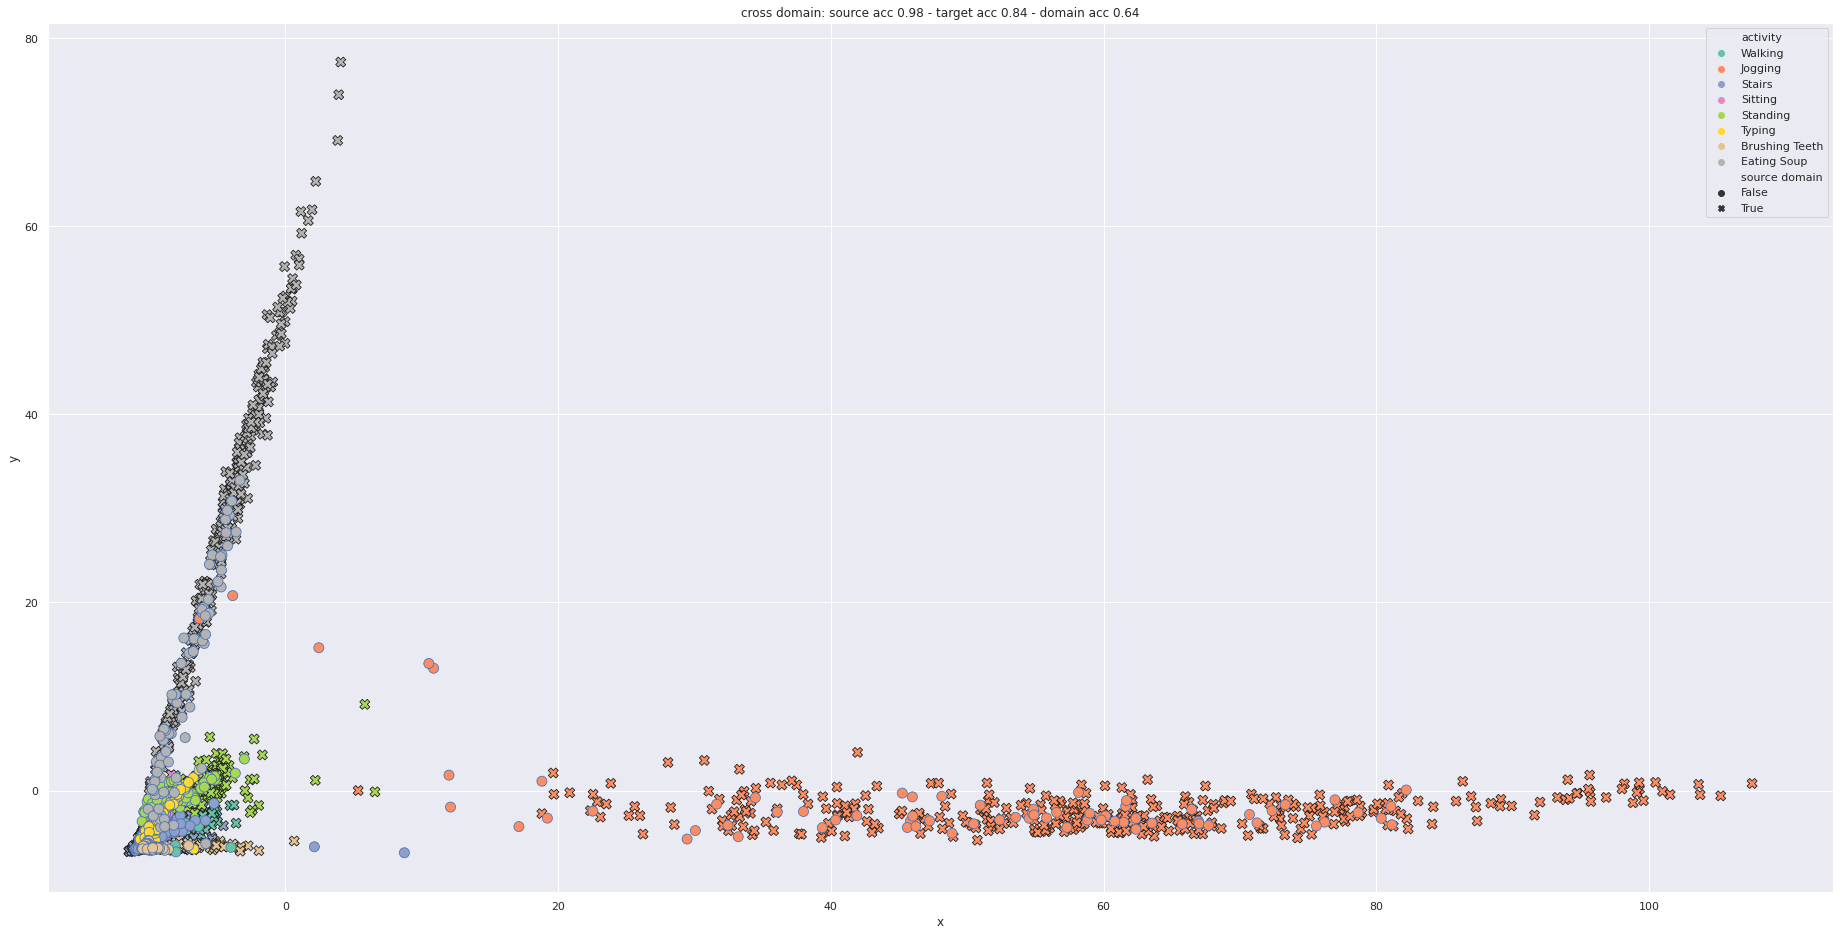

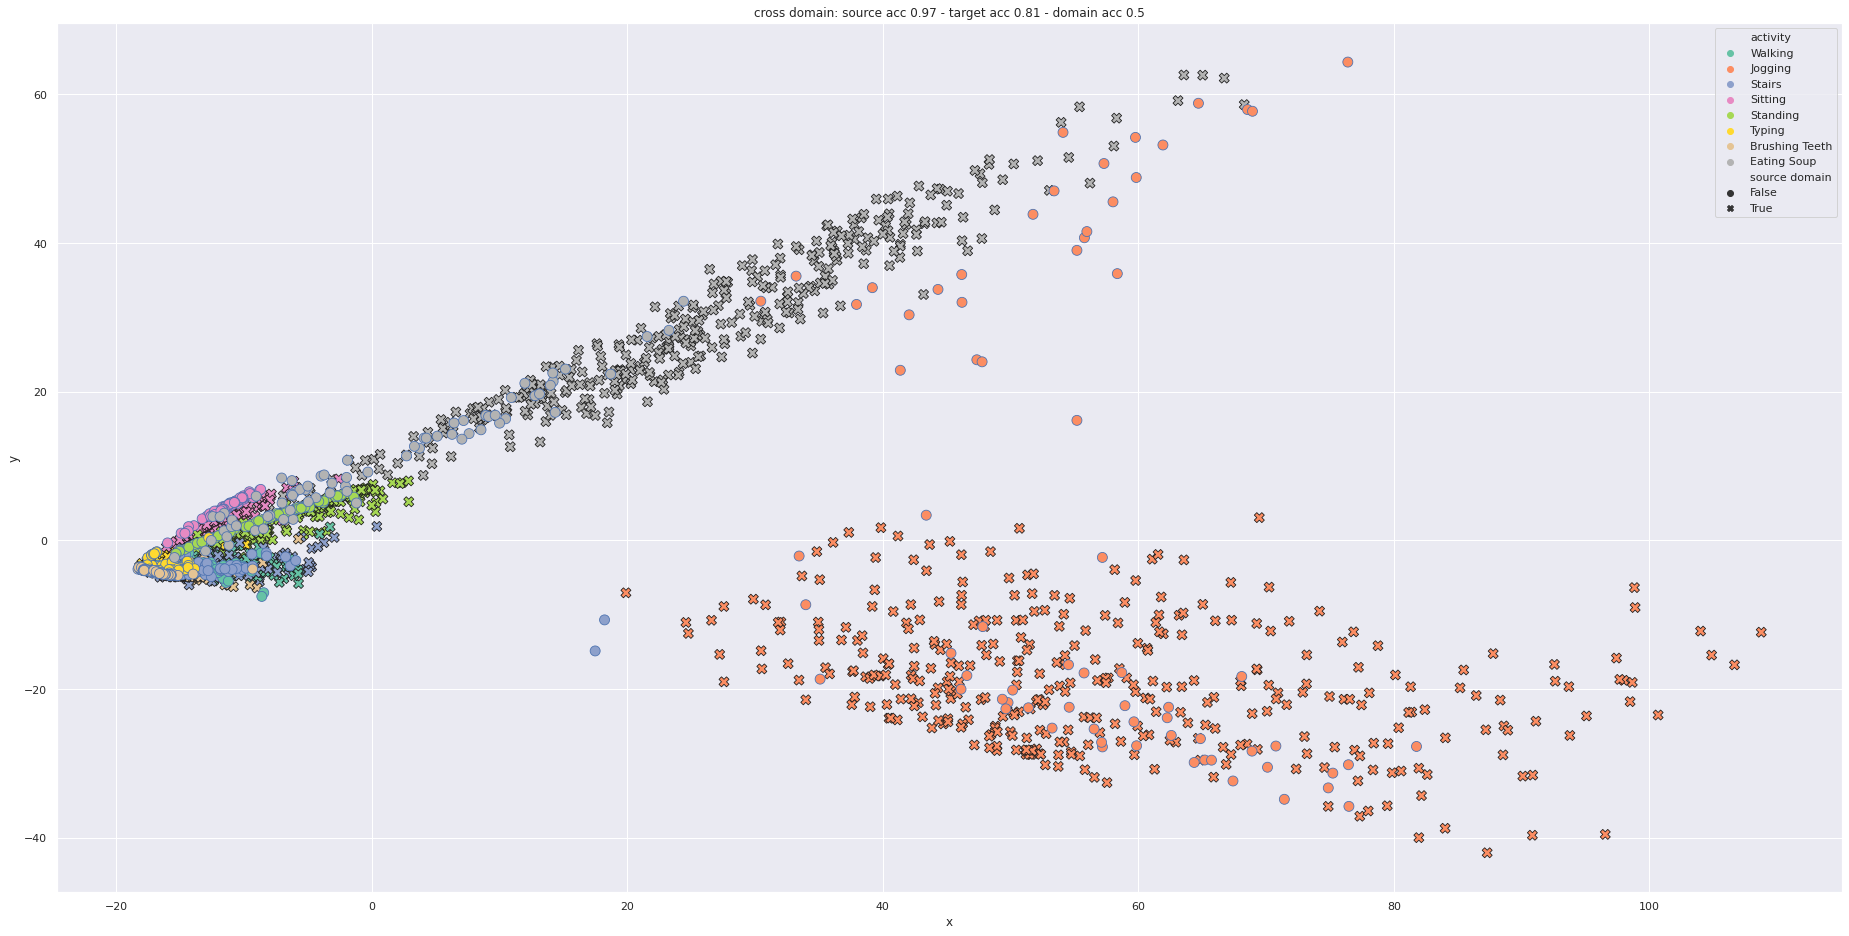

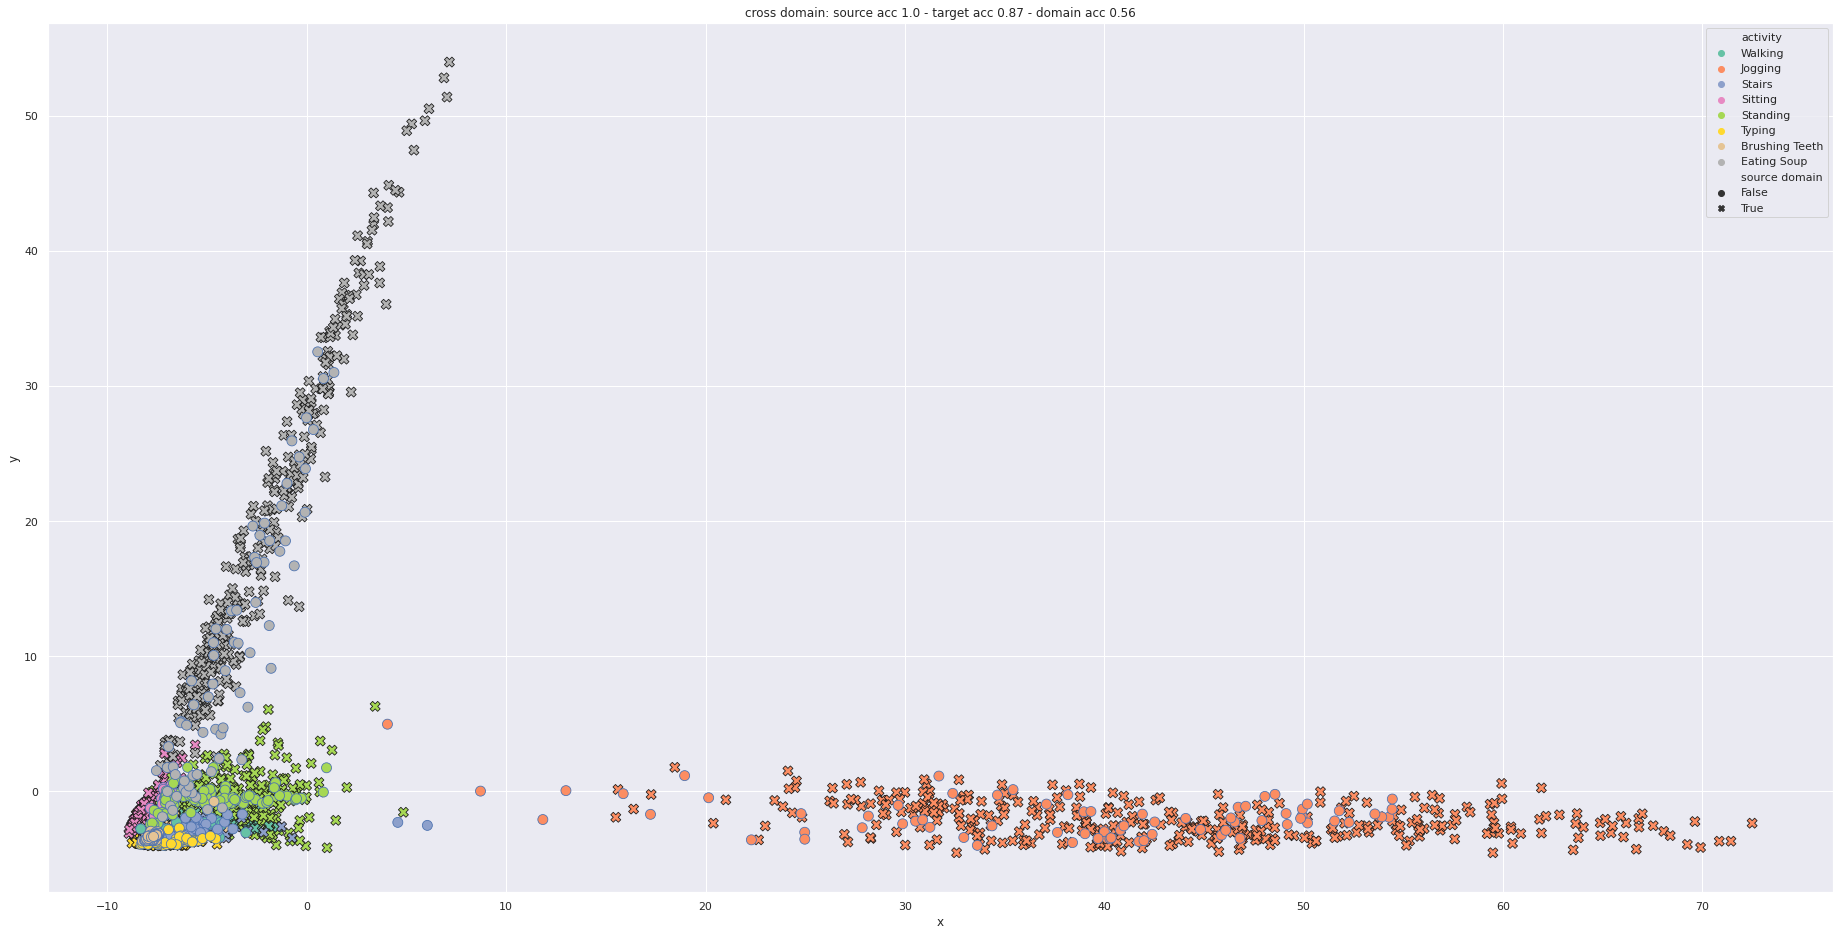

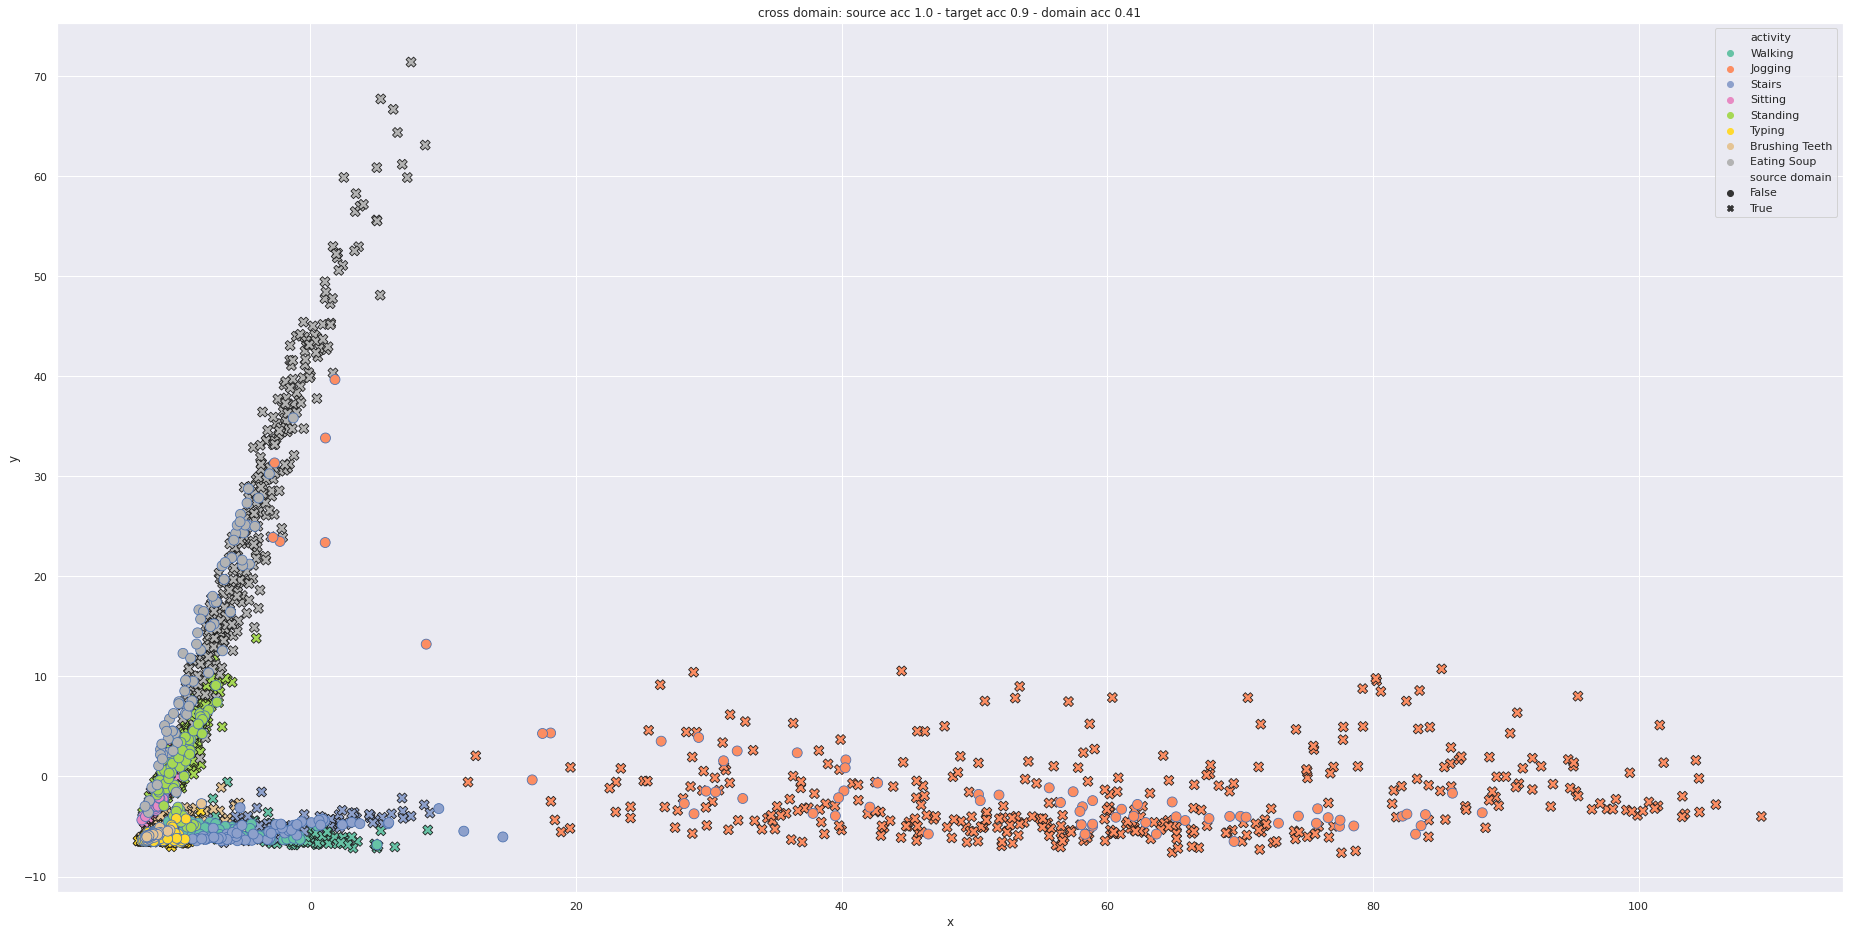

In [9]:
crossdomain_source_acc=[]
crossdomain_target_acc=[]

domain_label_acc=[]

for c in range(cv):
  tf.keras.backend.clear_session()
  crossdomain_model=dann.DANN(alpha=alpha,
                              epochs=EPOCHS,
                              batchsize=batchsize,
                              classifier_lr=clf_lr,
                              extractor_lr=ext_lr,
                              discriminator_lr=disc_lr)

  submodels=dann.submodel_config_march_15(num_class)
  crossdomain_model.set_submodels(submodels)

  crossdomain_model.cross_domain_train(seen_x,seen_y,unseen_x)

  source_acc=crossdomain_model.evaluate_classifier_acc(seen_x,seen_y)
  target_acc=crossdomain_model.evaluate_classifier_acc(unseen_x,unseen_y)
  domain_acc=crossdomain_model.evaluate_domain_acc(seen_x,unseen_x)

  print("============================ cv {}/{} ==========================".format(c+1,cv))
  print(source_acc)
  print(target_acc)
  print(domain_acc)
  print("==============================================================")

  crossdomain_source_acc.append(source_acc)
  crossdomain_target_acc.append(target_acc)
  domain_label_acc.append(domain_acc)

  dann.plot_pca_distributions(crossdomain_model.extractor,seen_x,seen_y,unseen_x,unseen_y,remapped_int_act_lookup)
  plt.title("cross domain: source acc {} - target acc {} - domain acc {}".format(np.round(source_acc,2),np.round(target_acc,2),np.round(domain_acc,2)))
  plt.legend(loc='upper right')

  plotname="crossdomain-{}_{}.jpg".format(c+1,cv)
  plotname=os.path.join(save_dir,plotname)

  plt.savefig(plotname,dpi=150,bbox_inches='tight')
  print(plotname)

summary['crossdomain source acc']=crossdomain_source_acc
summary['crossdomain target acc']=crossdomain_target_acc
summary['crossdomain domain acc']=domain_label_acc

In [10]:
print("source domain acc: ",crossdomain_source_acc)
print("avg: ",np.mean(crossdomain_source_acc))
print()
print("target domain acc: ",crossdomain_target_acc)
print("avg: ",np.mean(crossdomain_target_acc))

source domain acc:  [0.997887323943662, 0.9809859154929578, 0.9725352112676057, 0.9985915492957746, 0.9989436619718309]
avg:  0.9897887323943662

target domain acc:  [0.8556338028169014, 0.8433098591549296, 0.8080985915492958, 0.8732394366197183, 0.903169014084507]
avg:  0.8566901408450704


In [11]:
summary

{'act': {0: 'Walking',
  1: 'Jogging',
  2: 'Stairs',
  3: 'Sitting',
  4: 'Standing',
  5: 'Typing',
  6: 'Brushing Teeth',
  7: 'Eating Soup'},
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'crossdomain domain acc': [0.4692879499217527,
  0.6353677621283255,
  0.49960876369327073,
  0.564358372456964,
  0.4057120500782473],
 'crossdomain epoch': 90,
 'crossdomain source acc': [0.997887323943662,
  0.9809859154929578,
  0.9725352112676057,
  0.9985915492957746,
  0.9989436619718309],
 'crossdomain target acc': [0.8556338028169014,
  0.8433098591549296,
  0.8080985915492958,
  0.8732394366197183,
  0.903169014084507],
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain epoch': 20,
 'source class dist': {0: 355,
  1: 355,
  2: 355,
  3: 355,
  4: 355,
  5: 355,
  6: 355,
  7: 355},
 'source data shape': (2840, 100, 3),
 'source device': 'watch',
 'source sensor': 'accel',
 'source subj': [1600, 1601, 1602, 1603, 1604],
 'target class dist': {0: 71, 1: 71, 2: 71, 3: 71, 4: 71, 5: 7

In [12]:
indomain_source_acc=[]
indomain_target_acc=[]
indomain_label_acc=[]

for c in range(cv):
  indomain_model=dann.DANN(alpha=alpha,
                           epochs=indomain_epoch,
                           batchsize=batchsize,
                           classifier_lr=clf_lr,
                           extractor_lr=ext_lr,
                           discriminator_lr=disc_lr)
  
  submodels=dann.submodel_config_march_15(num_class)
  indomain_model.set_submodels(submodels)

  indomain_model.source_domain_train(seen_x,seen_y)

  source_acc=indomain_model.evaluate_classifier_acc(seen_x,seen_y)
  target_acc=indomain_model.evaluate_classifier_acc(unseen_x,unseen_y)
  domain_acc=indomain_model.evaluate_domain_acc(seen_x,unseen_x)
  print("============================ cv {}/{} ==========================".format(c+1,cv))
  print(source_acc)
  print(target_acc)
  print(domain_acc)
  print("==============================================================")

  indomain_source_acc.append(source_acc)
  indomain_target_acc.append(target_acc)
  indomain_label_acc.append(domain_acc)

  dann.plot_pca_distributions(indomain_model.extractor,seen_x,seen_y,unseen_x,unseen_y,remapped_int_act_lookup)
  plt.title("source domain only: source acc {} - target acc {} - domain acc {}".format(np.round(source_acc,2),np.round(target_acc,2),np.round(domain_acc,2)))
  plt.legend(loc='upper right')

  plotname="indomain-{}_{}.jpg".format(c+1,cv)
  plotname=os.path.join(save_dir,plotname)

  plt.savefig(plotname,dpi=150,bbox_inches='tight')
  print(plotname)  

  summary['indomain source acc']=indomain_source_acc
  summary['indomain target acc']=indomain_target_acc
  summary['indomain domain acc']=indomain_label_acc

Output hidden; open in https://colab.research.google.com to view.

In [13]:
print("source domain acc: ",indomain_source_acc)
print("avg: ",np.mean(indomain_source_acc))
print()
print("target domain acc: ",indomain_target_acc)
print("avg: ",np.mean(indomain_target_acc))

source domain acc:  [1.0, 1.0, 0.9989436619718309, 0.9936619718309859, 0.9834507042253521]
avg:  0.9952112676056337

target domain acc:  [0.6830985915492958, 0.6778169014084507, 0.6971830985915493, 0.6883802816901409, 0.6637323943661971]
avg:  0.6820422535211268


In [14]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S %m/%d")

summary['timestamp']=current_time

In [15]:
summary

{'act': {0: 'Walking',
  1: 'Jogging',
  2: 'Stairs',
  3: 'Sitting',
  4: 'Standing',
  5: 'Typing',
  6: 'Brushing Teeth',
  7: 'Eating Soup'},
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'crossdomain domain acc': [0.4692879499217527,
  0.6353677621283255,
  0.49960876369327073,
  0.564358372456964,
  0.4057120500782473],
 'crossdomain epoch': 90,
 'crossdomain source acc': [0.997887323943662,
  0.9809859154929578,
  0.9725352112676057,
  0.9985915492957746,
  0.9989436619718309],
 'crossdomain target acc': [0.8556338028169014,
  0.8433098591549296,
  0.8080985915492958,
  0.8732394366197183,
  0.903169014084507],
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain domain acc': [0.5346244131455399,
  0.3626760563380282,
  0.831377151799687,
  0.5794209702660407,
  0.16666666666666666],
 'indomain epoch': 20,
 'indomain source acc': [1.0,
  1.0,
  0.9989436619718309,
  0.9936619718309859,
  0.9834507042253521],
 'indomain target acc': [0.6830985915492958,
  0.6778169014084507,

In [16]:
summary_savepath=os.path.join(save_dir,'summary.json')
with open (summary_savepath,'w') as jfile:
  json.dump(summary,jfile)